# Introduction

The effect of social media on politics is a frequently discussed issue. Claims are often made by media outlets and regulators that social media has a generally negative effect on political sentiment in the US—that social media creates “echo chambers” of like-minded people which lead to polarization and increasingly extreme views.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline
sns.set(font_scale=2)

In [2]:
reddit = pd.read_csv('Data/reddit_data.csv', index_col=0)
biden = pd.read_csv('Data/approval_topline.csv', index_col=0)

In [3]:
reddit.head()

,author,body,created_utc,permalink,score,subreddit,total_awards_received,editable,Polarity,Subjectivity,Sentiment,date,target
0,execdysfunction,Maybe. We need to be aiming higher,2021-04-03 19:41:59,/r/politics/comments/mj839d/schumer_senate_wil...,1,politics,0,NaN,0.250000,0.500000,Positive,4/3/2021,53.414394
1,yappledapple,I hadn't heard that one. I think the ones stil...,2021-04-03 19:41:59,/r/politics/comments/mjcrfb/schumer_says_senat...,1,politics,0,NaN,-0.166667,0.500000,Negative,4/3/2021,53.414394
2,Tots4trump,“The statue was presented to the British as a ...,2021-04-03 19:41:56,/r/politics/comments/mjczhl/confederate_symbol...,1,politics,0,NaN,0.295000,0.430000,Positive,4/3/2021,53.414394
3,DroopyMcCool,Is this something that is in the DOI's purview...,2021-04-03 19:41:55,/r/politics/comments/mj6klw/secretary_deb_haal...,1,politics,0,NaN,0.068182,0.227273,Positive,4/3/2021,53.414394
4,FlyingRock,New York legalizing is definitely why it's bei...,2021-04-03 19:41:55,/r/politics/comments/mj839d/schumer_senate_wil...,1,politics,0,NaN,0.033939,0.517576,Positive,4/3/2021,53.414394


In [4]:
#create strings to use for generating word clouds
politics = reddit.loc[reddit['subreddit'] == 'politics']
politics_text = " ".join(comment for comment in politics['body'])

news = reddit.loc[reddit['subreddit'] == 'news']
news_text = " ".join(comment for comment in news['body'])

liberal = reddit.loc[reddit['subreddit'] == 'Liberal']
liberal_text = " ".join(comment for comment in liberal['body'])

democrats = reddit.loc[reddit['subreddit'] == 'democrats']
democrats_text = " ".join(comment for comment in democrats['body'])

conservative = reddit.loc[reddit['subreddit'] == 'Conservative']
conservative_text = " ".join(comment for comment in conservative['body'])

libertarian = reddit.loc[reddit['subreddit'] == 'Libertarian']
libertarian_text = " ".join(comment for comment in libertarian['body'])

## Polarity and Subjectivity

Using TextBlob I have generated polarity and subjectivity scores for each comment. Polarity is a measure of how positive or negative the sentiment of the text is, with 1 being the most positive, 0 being completely neutral, and -1 being the most negative. 

I want to explore these scores across the different subreddits, to see if there is a distinction between viewpoints.

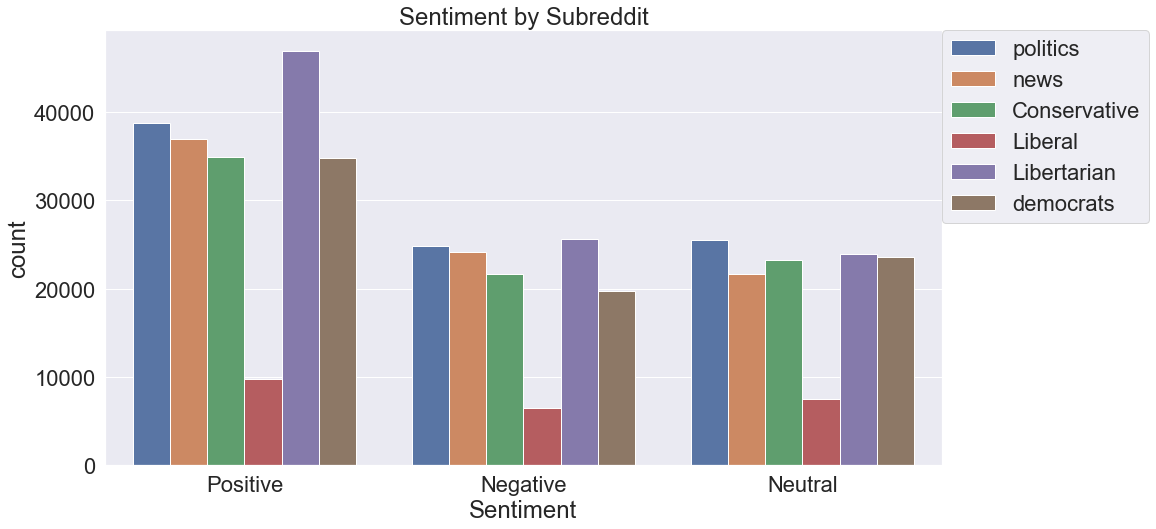

In [5]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.countplot(data=reddit, x='Sentiment', hue='subreddit').set_title('Sentiment by Subreddit')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0);

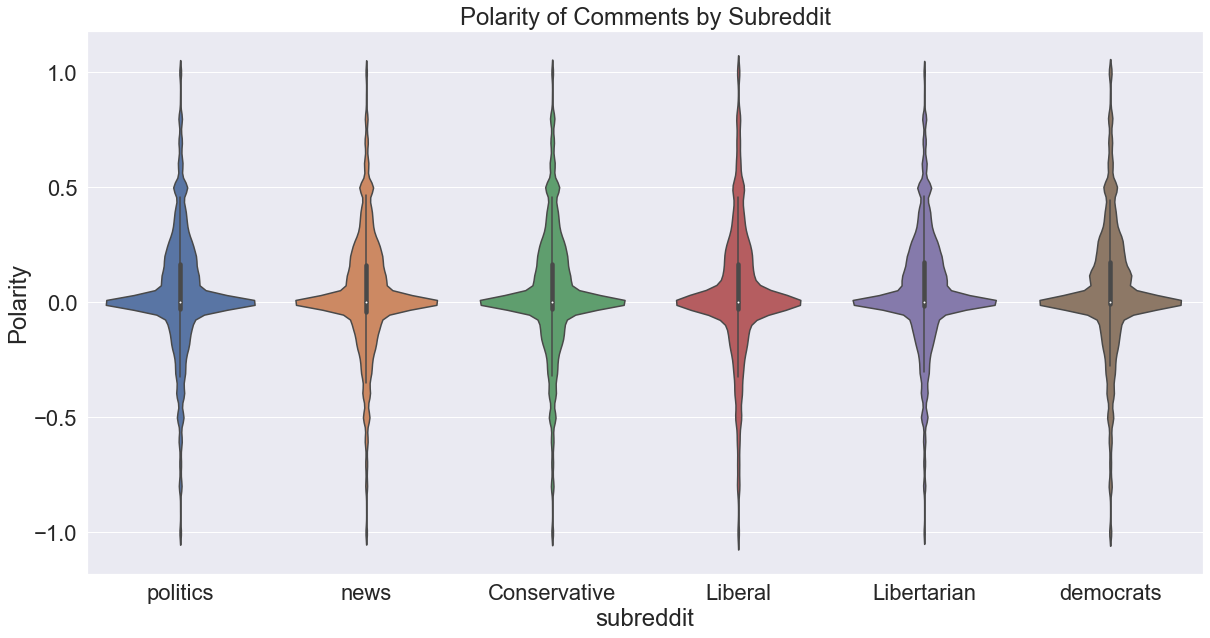

In [6]:
fig, ax = plt.subplots(figsize=(20,10))
sns.violinplot(y='Polarity', data=reddit, x='subreddit').set_title('Polarity of Comments by Subreddit');

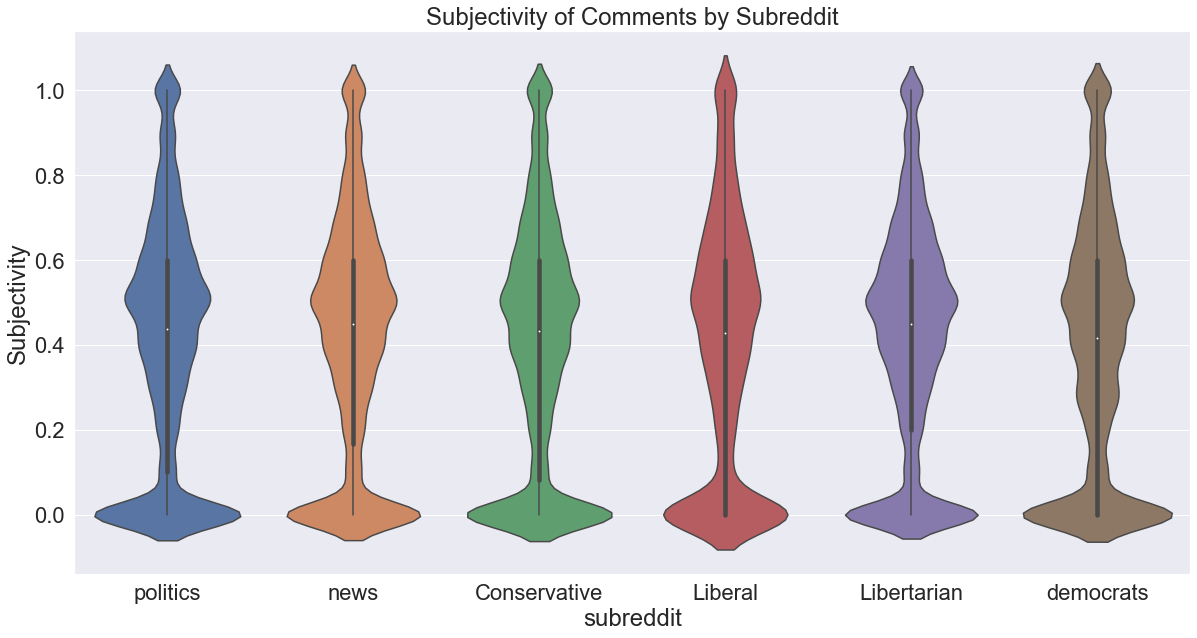

In [7]:
fig, ax = plt.subplots(figsize=(20,10))
sns.violinplot(y='Subjectivity', data=reddit, x='subreddit').set_title('Subjectivity of Comments by Subreddit');

Interestingly, there is very little variation between subreddits when it comes to both polarity and subjectivity, indicating that dispite their differing viewpoints, each subreddit can be said to be having similar caliber of discussion.

## Wordclouds

I'm also interested to look at wordclouds for each subreddit to see what key words are driving discussions.

In [8]:
#set of stopwords for the wordclouds
stopwords = set(STOPWORDS)
stopwords.update(['people', 'one', 'think', 'gt', 'reddit', 'https', 'know', 'will', 'make', 'even', 'u'])

def generate_wordcloud(text):
    wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(text)
    plt.figure(figsize=(15,15))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

### General Subreddits

Although this dataset only covers the year 2021, Donald Trump and the Republican party still dominate conversations on r/politics. On Reddit, "/s" is used at the end of comments to indicate that the remark is meant sarcastically--that "s" is also a frequent term used in all subreddits, indicating a high level of sarcasm in discussions.

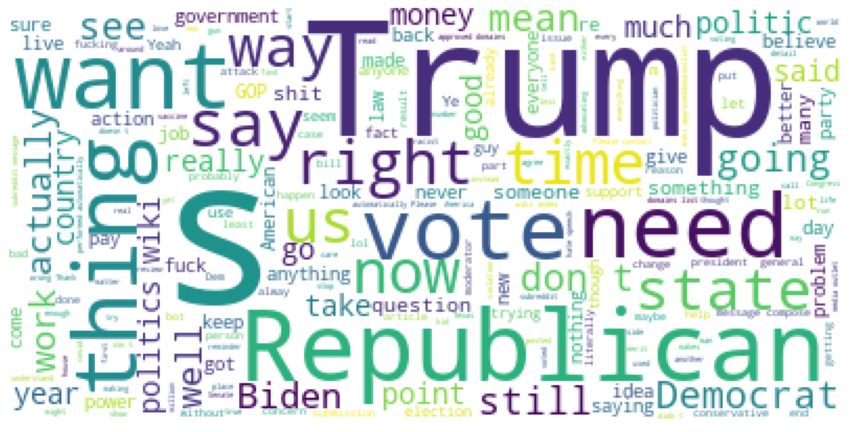

In [9]:
generate_wordcloud(politics_text)

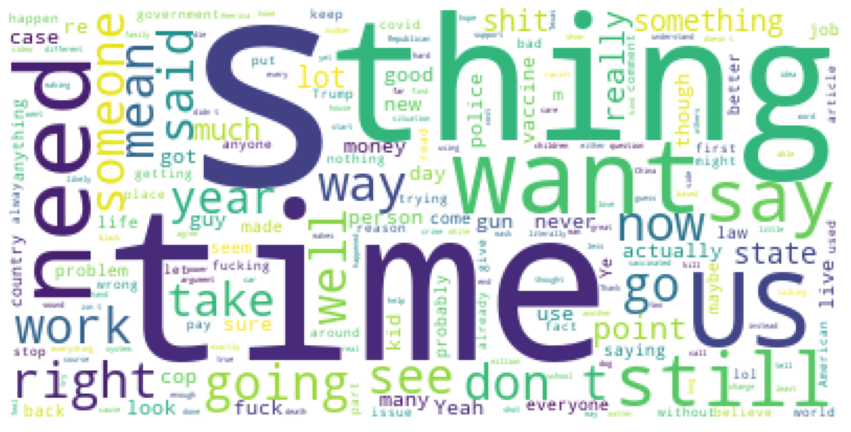

In [10]:
generate_wordcloud(news_text)

### Left-Leaning Subreddits

Donald Trump and the Republican party continue to be extremely frequent topics of conversation in left-leaning subreddits. Most other words that appear are largely generic, indicating that there isn't any specific topic or issue that's a frequent topic of conversation.

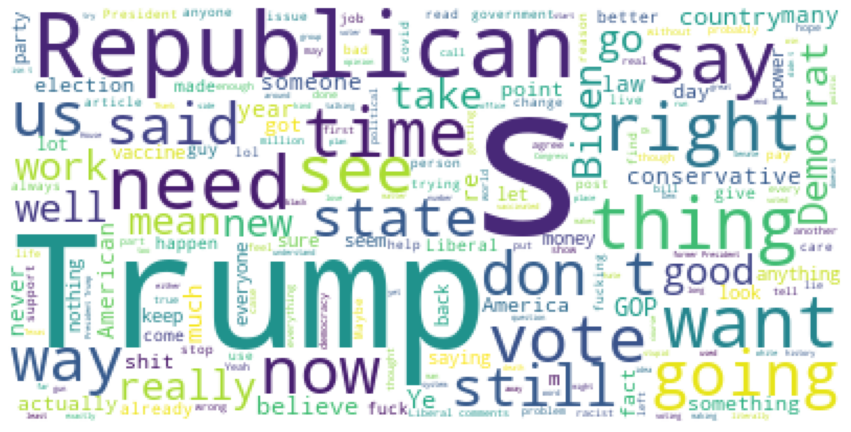

In [11]:
generate_wordcloud(liberal_text)

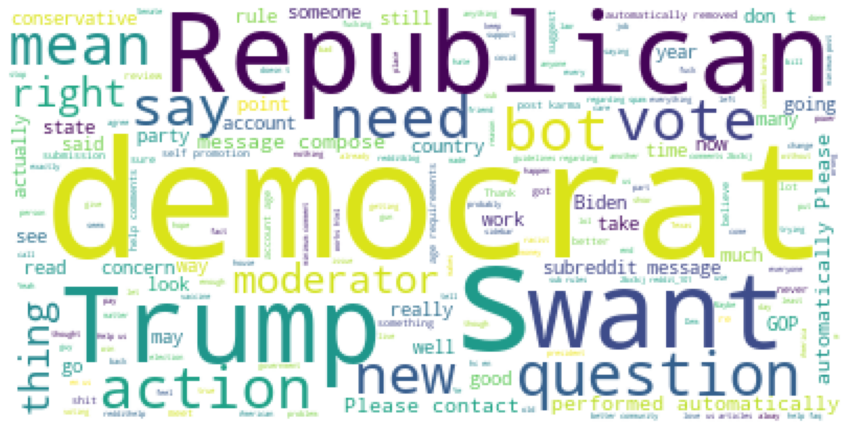

In [12]:
generate_wordcloud(democrats_text)

### Right-Leaning Subreddits

Interestingly, the word "Republican" is not used frequenlty in the right-leaning subreddits, despite being extremely frequent in others.

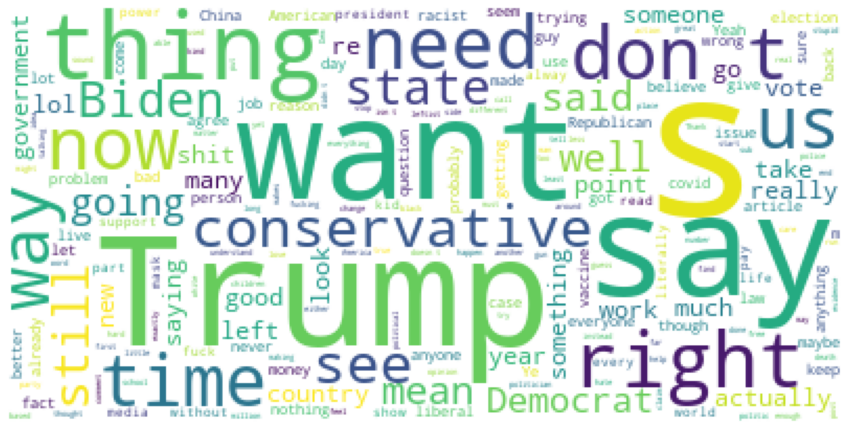

In [13]:
generate_wordcloud(conservative_text)

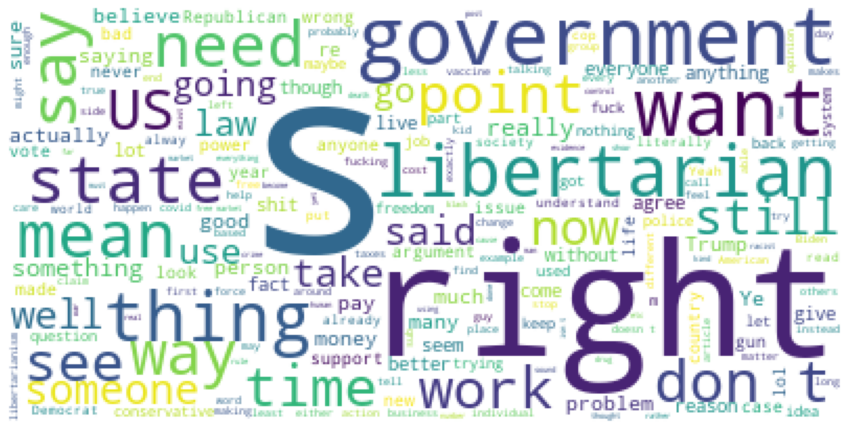

In [14]:
generate_wordcloud(libertarian_text)